# Clasificación de figuras MNIST con Redes Neuronales Convolucionales  
# Deep Learning


1) Importamos las siguientes biblotecas para deep learning: 

*   *tensorflow*, keras de tensorflow
*   *Conv2D* (capa convolucional de 2D)
*   *MaxPooling2D* (operacion Max pooling para data espacial 2D)
*   *Dropout* (aplica 0 a las entradas para prevenir overfitting)
*   *Flatten* (Aplanamiento de curva)
*   *Dense* (para la capa de salida)
*   *Numpy* (para operar con arrays)
*   *os, sys* (para interactuar con el sistema operativo)
*   *matplotlib* ( para graficado dentro de la linea de ejecucion de comando), al igual que *pandas*

Verificar version de tf

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
print(tf.__version__)

2.4.1


2) Ahora, cargamos el dataset MNIST. Las imagenes son matrices NumPy de 28x28, con valores de píxeles que oscilan entre 0 y 255. 
Las etiquetas son una matriz de números enteros, que van de 0 a 9. La tarea es tomar una de estas imagenes como entrada y predecir el digito mas probable 
contenido en la imagen (junto con una confianza relativa en esta prediccion):

In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# cambiar forma de imagenes para especificar que se encuentra en un canal simple
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images  = test_images.reshape( test_images.shape[0] , 28, 28, 1)

3) Normalizar valores a un rango de 0 a 1 .Es importante que el conjunto de entrenamiento y el conjunto de pruebas se preprocesen de la misma manera:

In [ ]:
def preprocess_images(imgs): # tanto para imagenes simples y multiples
    sample_img = imgs if len(imgs.shape) == 2 else imgs[0]
    assert sample_img.shape in [(28, 28, 1), (28, 28)], sample_img.shape # asegurar imagenes son 28x28 y en escala de grises
    return imgs / 255.0

train_images = preprocess_images(train_images)
test_images  = preprocess_images(test_images)

4) Desplegar las primeras 5 imagenes del conjunto de entrenamiento y mostrar el nombre de la clase debajo de cada imagen. Se verifica que los datos esten en el formato correcto




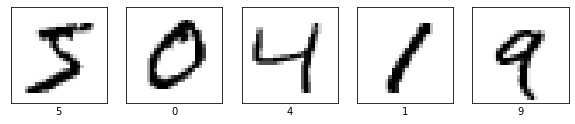

In [ ]:
plt.figure(figsize=(10,2)) # ploting en 10,2 pixeles
for i in range(5):
    plt.subplot(1,5,i+1) # fila 1, columna 5, iteracion i + 1
    plt.xticks([]) # ocultar escalas en eje x
    plt.yticks([]) # ocultar escalas en eje x
    plt.grid(False) # quitar malla
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)  # mostrar imagenes con mapa de caracteres binarios
    plt.xlabel(train_labels[i]) # mostrar nombre etiquetas en etiqueta x de cada imagen

5) Construimos el modelo secuencial. La construcción de la red neuronal requiere configurar las capas del modelo y luego compilar el modelo. En muchos casos, esto se puede reducir a simplemente apilar todas las capas juntas:

In [ ]:
model = keras.Sequential()
# capa convolucional: 32 filtros convolucionales cada uno de tamanho 3x3, con funcion de activacion relu
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# capa convolucional: 64 filtros convolucionales  cada uno de tamanho 3x3, con funcion de activacion relu
model.add(Conv2D(64, (3, 3), activation='relu'))

# escoger las mejores caracteristicas via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# aleatoriamente apagar y encender neuronas para mejorar convergencia
model.add(Dropout(0.25))

# aplanar curva dado que solo queremos una entrada de clasificacion
model.add(Flatten())

# capa densa, conectan cada neurona en una capa con todas las salidas de la capa anterior. Para los datos de salida
model.add(Dense(128, activation='relu'))

# dropout adicional
model.add(Dropout(0.5))

# aplicar funcion softmax para aplastar la matriz
model.add(Dense(10, activation='softmax'))

6) Se agregan configuraciones adicionales:

*   Funcion de perdida: mide la precision del modelo durante el entrenamiento; queremos minimizar esto con el optimizador.
*   Optimizador: como el modelo se actualiza en función de los datos que ve y su función de perdida (optimizador de adam).
*   Metricas: se utilizan para monitorear los pasos de entrenamiento y prueba. "accuracy" es la fraccion de imagenes que se clasifican correctamente



In [ ]:
model.compile(optimizer = tf.optimizers.Adam(), 
              loss ='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

7) Entrenar el modelo de red neuronal requiere los siguientes pasos:

*   Se ingresa los datos de entrenamiento en el modelo: las matrices train_images y train_labels
*   El modelo aprende a asociar imagenes y etiquetas (5 epocas).
*   Le pedimos al modelo que haga predicciones sobre un conjunto de prueba, en este ejemplo, la matriz test_images. Verificamos que las predicciones coincidan con las etiquetas de la matriz test_labels.

Para comenzar el entrenamiento, llamamos al metodo model.fit: el modelo se "ajusta" a los datos de entrenamiento:

In [ ]:
history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3826 - accuracy: 0.8788
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0871 - accuracy: 0.9738
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0660 - accuracy: 0.9809
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0520 - accuracy: 0.9835
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0468 - accuracy: 0.9861


A medida que el modelo se entrena, se muestran las métricas de pérdida y precisión. Este modelo alcanza una precisión de aproximadamente el 98% en los datos de entrenamiento.


8) Evaluar la precisión
A continuación, compare el rendimiento del modelo en el conjunto de datos de prueba:

In [ ]:
print(test_images.shape)
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test de precision (accuracy):', test_acc)
print('Test de precision (accuracy): {:.2f}%'.format(round(test_acc*100,2))  )

(10000, 28, 28, 1)
313/313 [==============================] - 1s 2ms/step - loss: 0.0316 - accuracy: 0.9899
Test de precision (accuracy): 0.9898999929428101
Test de precision (accuracy): 98.99%
